# term frequency analysis

In [1]:
import pandas as pd
import json
import numpy as np
import pylab
import nltk
import operator 
import json
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from collections import defaultdict

fr_filename='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#balancetonporc/tweet_fr.json'
df_fr = pd.read_json(fr_filename, orient="columns")


en_filename = 'C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#metoo/tweet_en.json'
df_en = pd.read_json(en_filename, orient="columns")


mt_filename='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#balancetonporc/metoo_fr.json'
df_mt = pd.read_json(fr_filename, orient="columns")


nmt_filename = 'C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#balancetonporc/nmt_fr.json'
df_nmt = pd.read_json(en_filename, orient="columns")



In [ ]:
test=np.random.randint(1, len(df_tweet['text']), 50)

for i in test:
    try:
        print('tweet numeros',i,':',df_tweet['text'].iloc[i],'\n')
    except:
        print('tweet numeros',i,':', 'ce tweet ne contient pas de texte===============')
    #print( 'tweet numeros',i,':',dfc['text'][i], '\n')

## utilisation de nltk

In [52]:
import stop_words
from nltk.corpus import stopwords
from nltk import bigrams 
from nltk import trigrams

def list_of_word(df_tweet,langue,filename):    
    tweet_mot=[]
    #stop=stopwords.words(langue)+["""’"""]+['…']+['a']
    sw = stop_words.get_stop_words(langue)+["""’"""]+['…']+['a']+['les']+['ça']+['cest']+['jai']+['â€¦']
    file = open(filename,'w',encoding='utf-8')
    for i in range(len(df_tweet['text'])):
        text=nltk.word_tokenize(df_tweet['text'].iloc[i])
        for j in range(len(text)):
            text[j]=text[j].lower()#everithing in lower case
            if text[j] not in sw:
                tweet_mot.append(text[j])
                file.write(text[j])
                file.write('\n')
                
    file.close()
    ### tweet_mot is a list of all the words in the tweets sans les mot dans les stop word
    ####
    return(tweet_mot)

def most_common(word_list,k,filename) :
    #unigram
    U=[]
    W=[]
    freq=Counter(word_list)
    uni=freq.most_common(k)
    for i in range(k):
        #print(h)
        U.append(uni[i][1])
        W.append(uni[i][0])
    data={'freq':U,'term':W}
    df_U=pd.DataFrame(data=data)
    print(uni)
    #bigram
    B=[]
    WB=[]
    tweet_bigram = bigrams(word_list)
    freq_bigram= Counter(tweet_bigram)
    bi=freq_bigram.most_common(k)
    
    for i in range(k):
        #print(h)
        B.append(bi[i][1])
        WB.append(str(bi[i][0][0])+' '+str(bi[i][0][1]))
    dataB={'term':WB,'freq':B}
    df_B=pd.DataFrame(data=dataB)
    dict_b = dict(zip(WB, B))
    
    print(bi)
    
    #trigram
    tweet_trigram = trigrams(word_list)
    freq_trigram= Counter(tweet_trigram)
    tri=freq_trigram.most_common(k)
    
    T=[]
    WT=[]
    for i in range(k):
        #print(h)
        T.append(tri[i][1])
        WT.append(str(tri[i][0][0])+' '+str(tri[i][0][1])+' '+str(tri[i][0][2]))
    dataT={'term':WT,'freq':T}
    df_T=pd.DataFrame(data=dataT)
    dict_t = dict(zip(WT, T))
    print(tri)
    
    
    
    writer = pd.ExcelWriter(filename)
    df_U.to_excel(writer,'unigram')
    df_B.to_excel(writer,'bigram')
    df_T.to_excel(writer,'trigram')
    writer.save()
    #return(dict(freq),dict_b,dict_t) #use this to plot wordcloud
    return(df_U,df_B,df_T)#return this one for return dataframe for the sentiment analisys
###################################################################################################
from wordcloud import WordCloud
def plot_wc(filename,filesave):
    text = open(filename,encoding="utf8").read()
    
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    
    # Display the generated image:
    # the matplotlib way:
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(filesave)
    plt.show()

def plot_wc_freq(filesave,freq):
    #text = open(filename,encoding="utf8").read()
    
    # Generate a word cloud image
    wordcloud = WordCloud().fit_words(frequencies=freq)
    
    # Display the generated image:
    # the matplotlib way:
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).fit_words(frequencies=freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(filesave)
    plt.show()


In [53]:
df_uni_fr,df_bi_fr,df_tri_fr=most_common(list_of_word(df_fr,'fr','list_fr.txt'),200,'most_common_fr.xlsx')
df_uni_en,df_bi_en,df_tri_en=most_common(list_of_word(df_en,'en','list_en.txt'),200,'most_common_en.xlsx')

[('femmes', 4576), ('porc', 4013), ('ans', 4009), ('harcèlement', 3429), ('plus', 3337), ('balance', 3134), ('bien', 2508), ('hashtag', 2490), ('c', 2484), ('via', 2438), ('mec', 2402), ('dit', 2073), ('hommes', 2046), ('après', 2014), ('non', 1911), ('sexuel', 1898), ('twitter', 1747), ('femme', 1706), ('rien', 1601), ('contre', 1575), ('quil', 1490), ('mecs', 1468), ('va', 1467), ('dire', 1402), ('victimes', 1391), ('toutes', 1352), ('rue', 1314), ('faut', 1296), ('homme', 1273), ('porcs', 1242), ('quon', 1145), ('filles', 1133), ('balancetonporc', 1112), ('main', 1096), ('viol', 1093), ('parler', 1091), ('plainte', 1088), ('monde', 1041), ('javais', 1016), ('weinstein', 996), ('jamais', 956), ('chez', 930), ('témoignages', 925), ('quoi', 910), ('s', 903), ('dun', 891), ('voir', 861), ('nest', 851), ('ds', 841), ('gros', 811), ('parle', 804), ('merci', 801), ('jour', 785), ('dune', 781), ('devant', 763), ('certains', 762), ('oui', 759), ('dénoncer', 741), ('mal', 732), ('fille', 718)

[(('après', 'affaire', 'weinstein'), 210), (('femmes', 'racontent', 'harcèlement'), 196), (('affaire', 'weinstein', 'libère'), 190), (('hashtag', 'balance', 'porc'), 179), (('contre', 'harcèlement', 'sexuel'), 178), (('weinstein', 'libère', 'twitter'), 168), (('harcèlement', 'sexuel', 'via'), 151), (('balance', 'porc', 'femmes'), 138), (('balance', 'porc', 'chasse'), 135), (('chasse', 'homme', 'chasse'), 121), (('homme', 'chasse', 'femmes'), 120), (('balance', 'porc', 'twitter'), 114), (('porc', 'chasse', 'homme'), 109), (('victimes', 'harcèlement', 'sexuel'), 105), (('porc', 'femmes', 'racontent'), 102), (('dénoncer', 'harcèlement', 'sexuel'), 102), (('racontent', 'harcèlement', 'agressions'), 101), (('harcèlement', 'sexuel', 'travail'), 96), (('racontent', 'harcèlement', 'sexuel'), 94), (('milliers', 'femmes', 'racontent'), 91), (('chasse', 'femmes', 'via'), 91), (('twitter', 'milliers', 'femmes'), 88), (('porc', 'twitter', 'milliers'), 85), (('femmes', 'dénoncent', 'harcèlement'), 8

[(('sexual', 'harassment'), 4697), (('sexual', 'assault'), 3065), (('harvey', 'weinstein'), 1245), (('sexual', 'abuse'), 1229), (('sexually', 'harassed'), 922), (('social', 'media'), 864), (('share', 'stories'), 845), (('years', 'ago'), 712), (('sexually', 'assaulted'), 708), (('men', 'can'), 708), (('â€', '“'), 603), (('sexual', 'violence'), 520), (('â€', '”'), 518), (('sexual', 'predator'), 496), (('stories', 'sexual'), 493), (('come', 'forward'), 485), (('monica', 'lewinsky'), 450), (('every', 'woman'), 442), (('many', 'women'), 439), (('harassment', 'assault'), 430), (('women', 'say'), 396), (('men', 'women'), 388), (('can', 'response'), 384), (('bill', 'clinton'), 372), (('decent', 'men'), 363), (('alyssa', 'milano'), 350), (('french', 'women'), 347), (('women', 'men'), 344), (('european', 'parliament'), 339), (('lewinsky', 'tweets'), 337), (('antonio', 'texas'), 333), (('woman', 'created'), 324), (('years', 'old'), 322), (('elizabeth', 'warren'), 316), (('u', 's'), 316), (('taran

In [ ]:
df_uni_mt,df_bi_mt,df_tri_mt=most_common(list_of_word(df_mt,'fr','list_mt.txt'),200,'most_common_mt.xlsx')
df_uni_nmt,df_bi_nmt,df_tri_nmt=most_common(list_of_word(df_nmt,'fr','list_nmt.txt'),200,'most_common_en.xlsx')

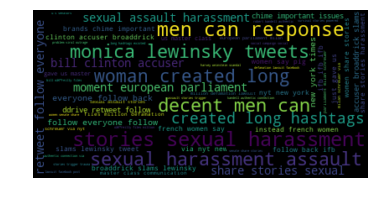

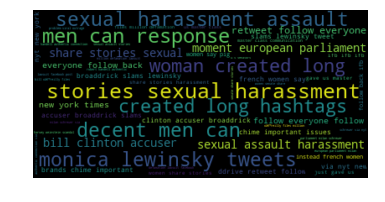

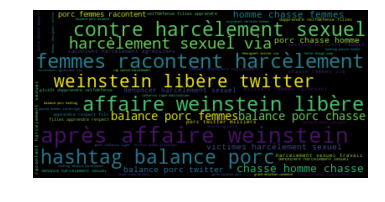

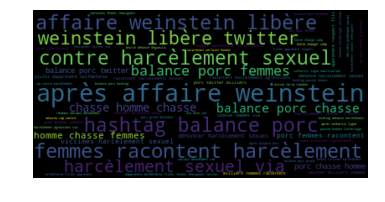

In [10]:
#plot_wc('list_fr.txt','word_fr.png')
#plot_wc('list_en.txt','word_en.png')
plot_wc_freq('word_en_freq.png',tri_en)
plot_wc_freq('word_fr_freq.png',tri_fr)
#bi_fr
#K=list(bi_fr.keys())
#print(K[0])

### Coucurence matrix, understand the context

In [33]:

# remember to include the other import from the previous post
def co_matrix(df_tweet,langue):
    com = defaultdict(lambda : defaultdict(int))
    sw = stop_words.get_stop_words(langue)+["""’"""]+['…']+['a']+['les']+['ça']+['cest']+['jai']+['â€¦']
    # extracting each tweet
    for i in range(len(df_tweet['text'])):
        text=nltk.word_tokenize(df_tweet['text'].iloc[i])
        terms_only = [term for term in text if term not in sw]
     
        # Build co-occurrence matrix
        for k in range(len(terms_only)-1):            
            for j in range(k+1, len(terms_only)):
                w1, w2 = sorted([terms_only[k], terms_only[j]])                
                if w1 != w2:
                    com[w1][w2] += 1
    com_max = []
    # For each term, look for the most common co-occurrent terms
    for t1 in com:
        t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
        for t2, t2_count in t1_max_terms:
            com_max.append(((t1, t2), t2_count))
    # Get the most frequent co-occurrences
    terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
    ##############
    df_com=pd.DataFrame()
    df_com["term"] = np.nan
    df_com["freq"] = np.nan
    for i in range(150):
        df_com.loc[i]=pd.Series({"term":str(terms_max[i][0][0])+' '+str(terms_max[i][0][1]),"freq":terms_max[i][1] })
        
    #df_com.to_excel('com_term_en.xlsx')
    print(terms_max[:20])
    return(terms_max,df_com)

In [47]:
ter_fr,df_com_fr=co_matrix(df_fr,'fr')
ter_en,df_com_en=co_matrix(df_en,'en')


[(('balance', 'porc'), 2610), (('harcèlement', 'sexuel'), 1548), (('ans', 'javais'), 807), (('femmes', 'harcèlement'), 694), (('femmes', 'hommes'), 576), (('balance', 'via'), 539), (('porc', 'via'), 522), (('harcèlement', 'via'), 491), (('femmes', 'via'), 481), (('femmes', 'porc'), 466), (('ans', 'mec'), 447), (('balance', 'femmes'), 444), (('harcèlement', 'twitter'), 434), (('plainte', 'porter'), 422), (('ramadan', 'tariq'), 410), (('femmes', 'sexuel'), 395), (('harcèlement', 'porc'), 387), (('sexuel', 'via'), 383), (('sexuel', 'twitter'), 363), (('twitter', 'via'), 360)]
[(('harassment', 'sexual'), 5311), (('assault', 'sexual'), 3772), (('men', 'women'), 3141), (('sexual', 'women'), 2216), (('harassment', 'women'), 1698), (('abuse', 'sexual'), 1578), (('daily', 'latest'), 1576), (('harvey', 'weinstein'), 1260), (('stories', 'women'), 1186), (('say', 'women'), 1179), (('can', 'men'), 1143), (('share', 'stories'), 1122), (('harassed', 'sexually'), 1016), (('men', 'sexual'), 982), (('ha

In [ ]:
search_word = 'souvenir' # 
count_search = Counter()
for i in range(len(df_tweet['text'])):
    text=nltk.word_tokenize(df_tweet['text'].iloc[i])
    terms_only = [term for term in text if term not in sw]
    if search_word in terms_only:
        count_search.update(terms_only)
print("Co-occurrence for %s:" % search_word)
print(count_search.most_common(200))

## Sentiment analysis

In [62]:
from labMTsimple.storyLab import *
#####################################
def score(text,lang):
    labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)
    words = text.split()
    s=0
    k=0
    for word in words :
        if word in labMTwordList:
            s+= float(labMT[word][1])
            k+=1 #number of word that labMT count
    if k==0:
        return(0)
    return(s/k)
#####################################
def sentiment_evaluation(df,lang): # THe entry is a data frame composed of 2 column : 'term' and 'freq'  
    #df['score']=np.nan
    S=[]
    for i in range(len(df)):
        S.append(score(df['term'].iloc[i],lang))
    df['score']=S
    df_final=df[df['score']>=1]# we drop all the 0
    df_final['med']=df['score'].median()
    df_final['mean']=df['score'].mean()
    df_final['std']=df['score'].std()
    df_final['freq /1000']=df['freq']/df['freq'].sum()*1000
    df_final.to_excel('score_tab_tri_fr.xlsx')
    return(df_final)


In [63]:
sentiment_evaluation(df_tri_fr,'french')

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,freq,term,score,med,mean,std,freq /1000
0,210,après affaire weinstein,5.260000,5.28,4.646817,1.869683,21.529629
1,196,femmes racontent harcèlement,6.740000,5.28,4.646817,1.869683,20.094320
2,190,affaire weinstein libère,5.300000,5.28,4.646817,1.869683,19.479188
3,179,hashtag balance porc,4.930000,5.28,4.646817,1.869683,18.351446
4,178,contre harcèlement sexuel,4.040000,5.28,4.646817,1.869683,18.248924
5,168,weinstein libère twitter,5.460000,5.28,4.646817,1.869683,17.223703
6,151,harcèlement sexuel via,5.280000,5.28,4.646817,1.869683,15.480828
7,138,balance porc femmes,5.880000,5.28,4.646817,1.869683,14.148042
8,135,balance porc chasse,4.390000,5.28,4.646817,1.869683,13.840476
9,121,chasse homme chasse,4.513333,5.28,4.646817,1.869683,12.405167


## use of sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#tweet=tweet_df['text'].values.tolist()
tweet=tweet_df['text'].values.tolist()
vec=CountVectorizer(analyzer='word', 
        encoding='utf-8',lowercase=True, max_df=1.0, max_features=2500, min_df=1,
        ngram_range=(1, 1), preprocessor=None,stop_words=set(stopwords.words('french')))
vec.fit_transform(tweet)
#print(tweet[:100])

In [ ]:
from collections import Counter
Counter(vec.vocabulary_).most_common(50)